In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

Matplotlib is building the font cache; this may take a moment.


In [2]:
df = pd.read_csv('../artifacts/raw/data.csv')

In [3]:
df.head()

Timestamp  Machine_ID Operation_Mode  Temperature_C  \
0  2024-01-01 00:00:00          39           Idle      74.137590   
1  2024-01-01 00:01:00          29         Active      84.264558   
2  2024-01-01 00:02:00          15         Active      44.280102   
3  2024-01-01 00:03:00          43         Active      40.568502   
4  2024-01-01 00:04:00           8           Idle      75.063817   

   Vibration_Hz  Power_Consumption_kW  Network_Latency_ms  Packet_Loss_%  \
0      3.500595              8.612162           10.650542       0.207764   
1      3.355928              2.268559           29.111810       2.228464   
2      2.079766              6.144105           18.357292       1.639416   
3      0.298238              4.067825           29.153629       1.161021   
4      0.345810              6.225737           34.029191       4.796520   

   Quality_Control_Defect_Rate_%  Production_Speed_units_per_hr  \
0                       7.751261                     477.657391   
1                       4.989172                     398.174747   
2                       0.456816                     108.074959   
3                       4.582974                     329.579410   
4                       2.287716                     159.113525   

   Predictive_Maintenance_Score  Error_Rate_% Efficiency_Status  
0                      0.344650     14.965470               Low  
1                      0.769848      7.678270               Low  
2                      0.987086      8.198391               Low  
3                      0.983390      2.740847            Medium  
4                      0.573117     12.100686               Low

In [5]:
df.shape

(100000, 13)

In [6]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors='coerce')

In [7]:
categorical_col = ['Operation_Mode', 'Efficiency_Status']
for col in categorical_col:
    df[col] = df[col].astype('category')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Timestamp                      100000 non-null  datetime64[ns]
 1   Machine_ID                     100000 non-null  int64         
 2   Operation_Mode                 100000 non-null  category      
 3   Temperature_C                  100000 non-null  float64       
 4   Vibration_Hz                   100000 non-null  float64       
 5   Power_Consumption_kW           100000 non-null  float64       
 6   Network_Latency_ms             100000 non-null  float64       
 7   Packet_Loss_%                  100000 non-null  float64       
 8   Quality_Control_Defect_Rate_%  100000 non-null  float64       
 9   Production_Speed_units_per_hr  100000 non-null  float64       
 10  Predictive_Maintenance_Score   100000 non-null  float64       
 11  E

EDA

In [9]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

In [12]:
len(numeric_cols)

10

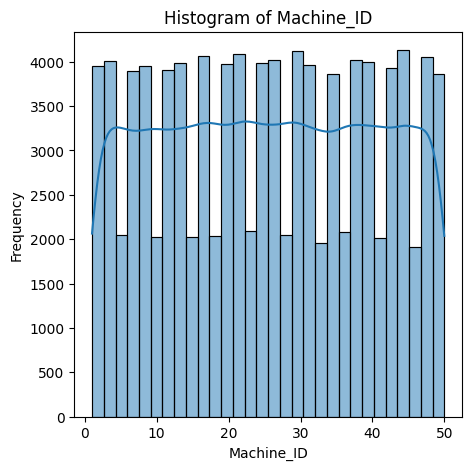

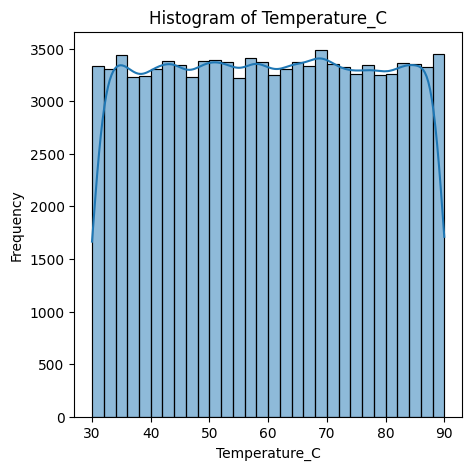

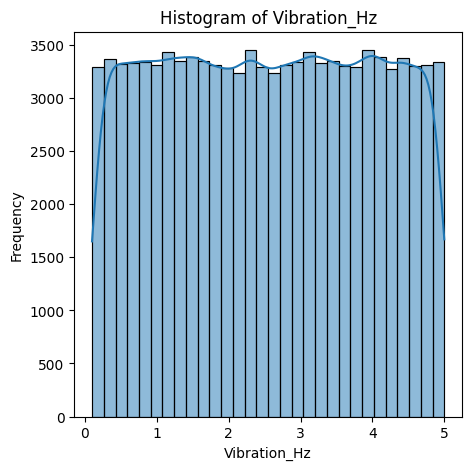

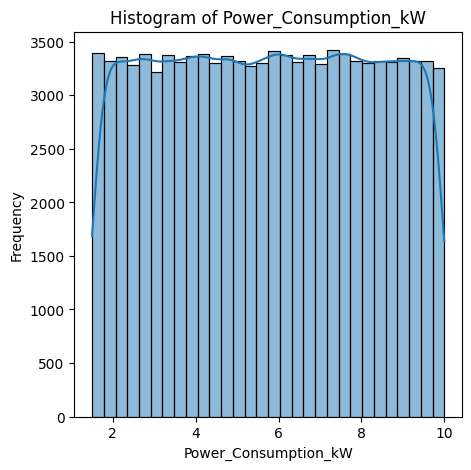

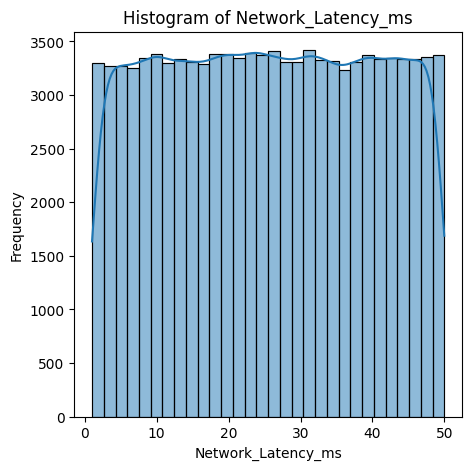

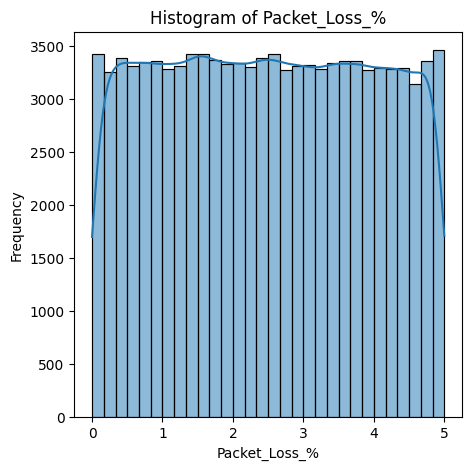

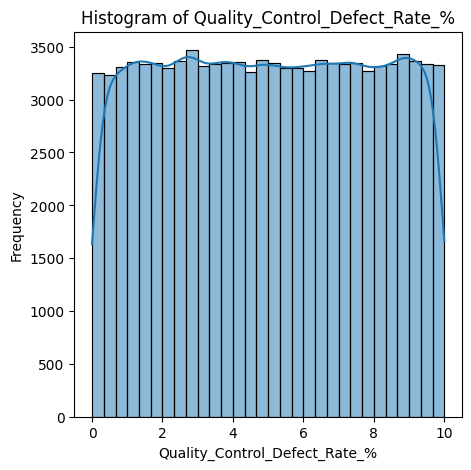

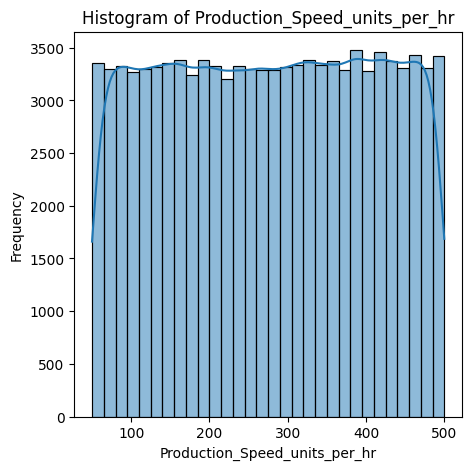

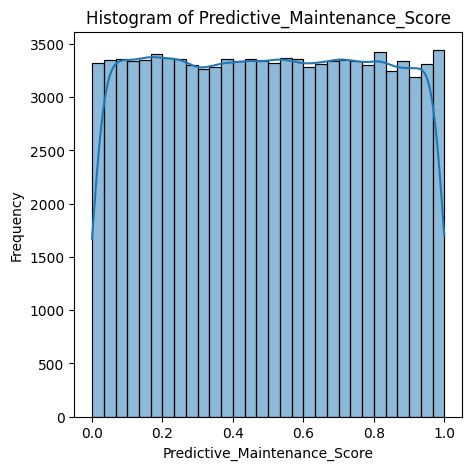

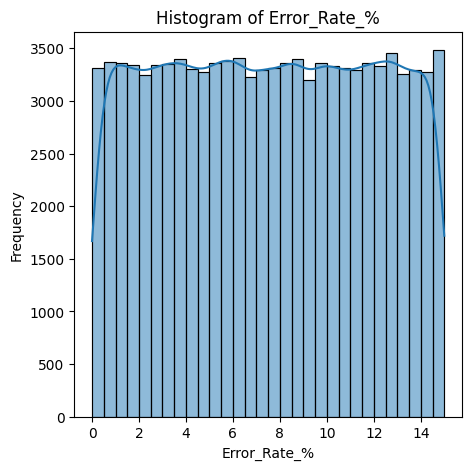

In [13]:
for col in numeric_cols:
    plt.figure(figsize=(5, 5))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

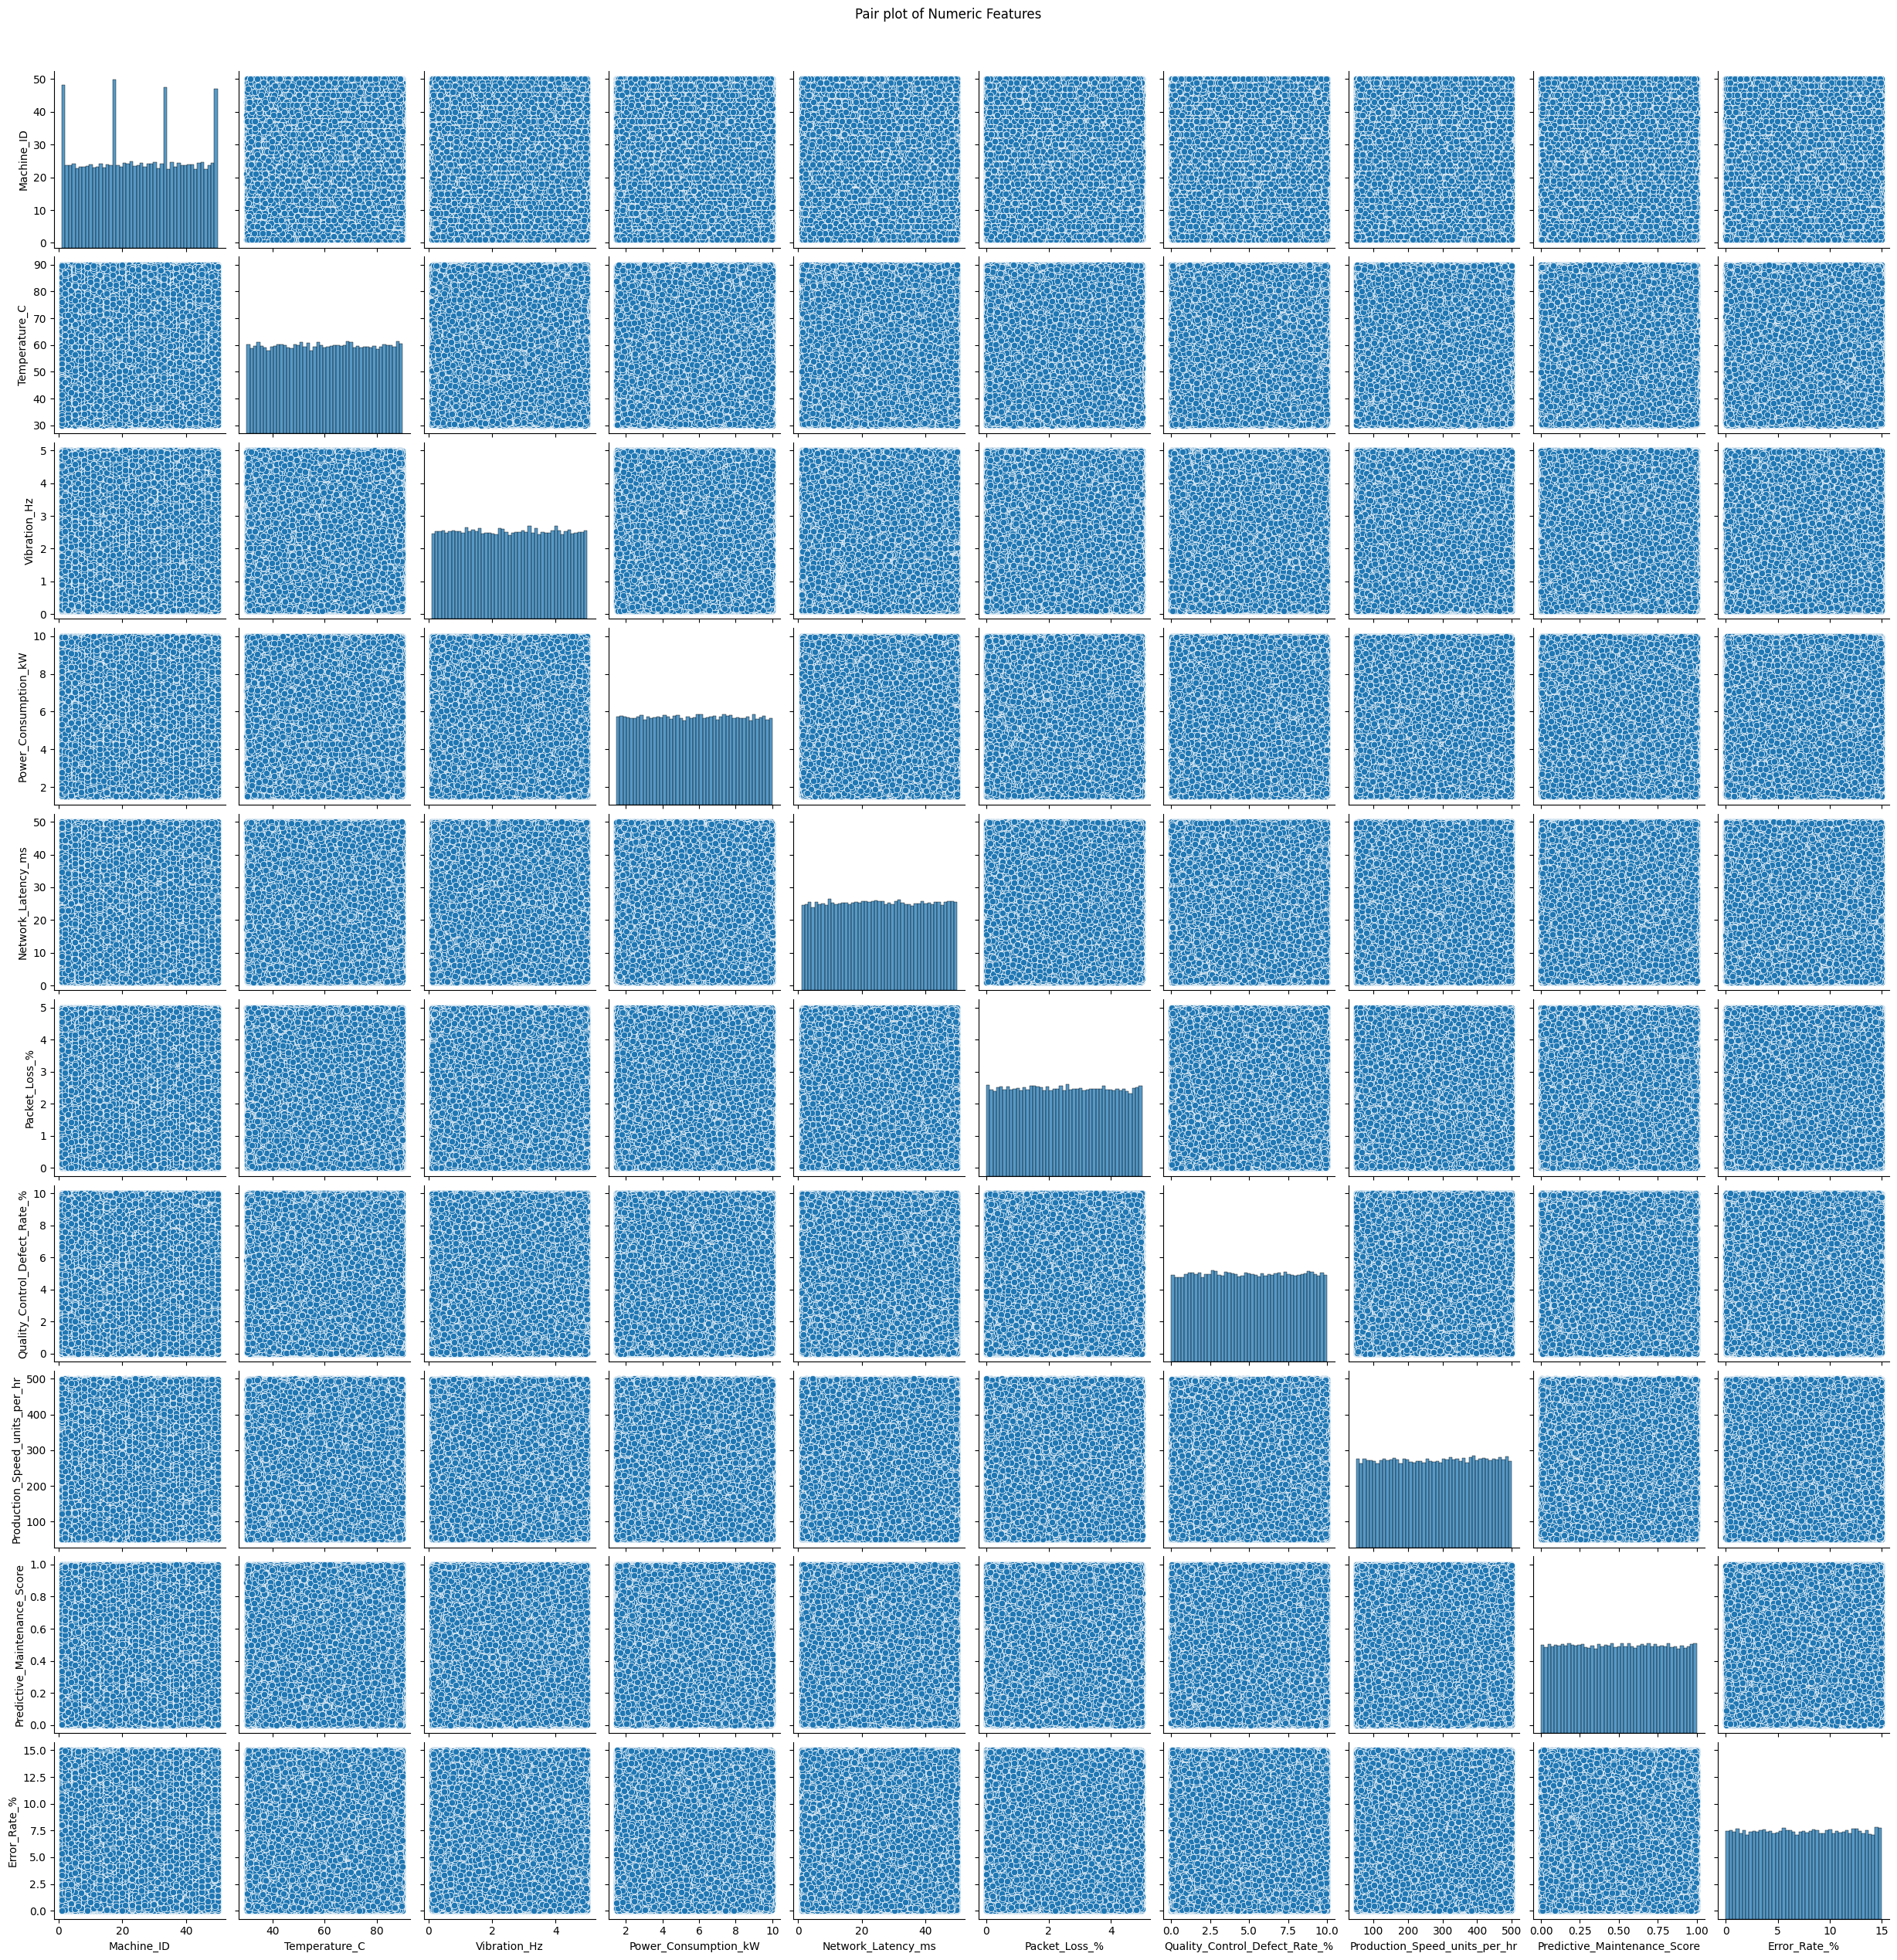

In [14]:
sns.pairplot(df[numeric_cols])
plt.suptitle('Pair plot of Numeric Features', y=1.02)
plt.show()

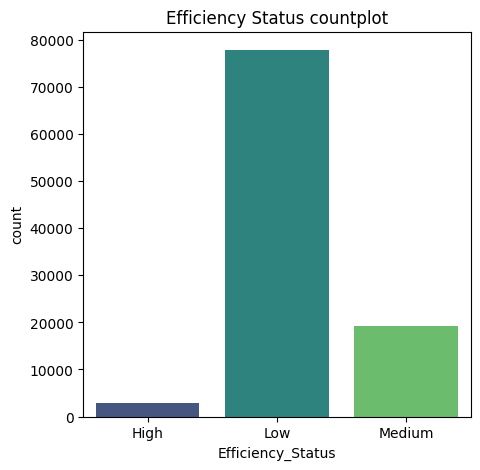

In [15]:
plt.figure(figsize=(5, 5))
sns.countplot(x='Efficiency_Status', data=df, palette='viridis')
plt.title('Efficiency Status countplot')
plt.show()


FE

In [16]:
df.head()

Timestamp  Machine_ID Operation_Mode  Temperature_C  Vibration_Hz  \
0 2024-01-01 00:00:00          39           Idle      74.137590      3.500595   
1 2024-01-01 00:01:00          29         Active      84.264558      3.355928   
2 2024-01-01 00:02:00          15         Active      44.280102      2.079766   
3 2024-01-01 00:03:00          43         Active      40.568502      0.298238   
4 2024-01-01 00:04:00           8           Idle      75.063817      0.345810   

   Power_Consumption_kW  Network_Latency_ms  Packet_Loss_%  \
0              8.612162           10.650542       0.207764   
1              2.268559           29.111810       2.228464   
2              6.144105           18.357292       1.639416   
3              4.067825           29.153629       1.161021   
4              6.225737           34.029191       4.796520   

   Quality_Control_Defect_Rate_%  Production_Speed_units_per_hr  \
0                       7.751261                     477.657391   
1                       4.989172                     398.174747   
2                       0.456816                     108.074959   
3                       4.582974                     329.579410   
4                       2.287716                     159.113525   

   Predictive_Maintenance_Score  Error_Rate_% Efficiency_Status  
0                      0.344650     14.965470               Low  
1                      0.769848      7.678270               Low  
2                      0.987086      8.198391               Low  
3                      0.983390      2.740847            Medium  
4                      0.573117     12.100686               Low

In [17]:
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day

df['Hour'] = df['Timestamp'].dt.hour

In [18]:
df.head()

Timestamp  Machine_ID Operation_Mode  Temperature_C  Vibration_Hz  \
0 2024-01-01 00:00:00          39           Idle      74.137590      3.500595   
1 2024-01-01 00:01:00          29         Active      84.264558      3.355928   
2 2024-01-01 00:02:00          15         Active      44.280102      2.079766   
3 2024-01-01 00:03:00          43         Active      40.568502      0.298238   
4 2024-01-01 00:04:00           8           Idle      75.063817      0.345810   

   Power_Consumption_kW  Network_Latency_ms  Packet_Loss_%  \
0              8.612162           10.650542       0.207764   
1              2.268559           29.111810       2.228464   
2              6.144105           18.357292       1.639416   
3              4.067825           29.153629       1.161021   
4              6.225737           34.029191       4.796520   

   Quality_Control_Defect_Rate_%  Production_Speed_units_per_hr  \
0                       7.751261                     477.657391   
1                       4.989172                     398.174747   
2                       0.456816                     108.074959   
3                       4.582974                     329.579410   
4                       2.287716                     159.113525   

   Predictive_Maintenance_Score  Error_Rate_% Efficiency_Status  Year  Month  \
0                      0.344650     14.965470               Low  2024      1   
1                      0.769848      7.678270               Low  2024      1   
2                      0.987086      8.198391               Low  2024      1   
3                      0.983390      2.740847            Medium  2024      1   
4                      0.573117     12.100686               Low  2024      1   

   Day  Hour  
0    1     0  
1    1     0  
2    1     0  
3    1     0  
4    1     0

In [19]:
df.drop(columns=['Timestamp', 'Machine_ID'], inplace=True)


In [20]:
df.head()

Operation_Mode  Temperature_C  Vibration_Hz  Power_Consumption_kW  \
0           Idle      74.137590      3.500595              8.612162   
1         Active      84.264558      3.355928              2.268559   
2         Active      44.280102      2.079766              6.144105   
3         Active      40.568502      0.298238              4.067825   
4           Idle      75.063817      0.345810              6.225737   

   Network_Latency_ms  Packet_Loss_%  Quality_Control_Defect_Rate_%  \
0           10.650542       0.207764                       7.751261   
1           29.111810       2.228464                       4.989172   
2           18.357292       1.639416                       0.456816   
3           29.153629       1.161021                       4.582974   
4           34.029191       4.796520                       2.287716   

   Production_Speed_units_per_hr  Predictive_Maintenance_Score  Error_Rate_%  \
0                     477.657391                      0.344650     14.965470   
1                     398.174747                      0.769848      7.678270   
2                     108.074959                      0.987086      8.198391   
3                     329.579410                      0.983390      2.740847   
4                     159.113525                      0.573117     12.100686   

  Efficiency_Status  Year  Month  Day  Hour  
0               Low  2024      1    1     0  
1               Low  2024      1    1     0  
2               Low  2024      1    1     0  
3            Medium  2024      1    1     0  
4               Low  2024      1    1     0

In [21]:
df.shape

(100000, 15)

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
Label_encoder = LabelEncoder()
df['Efficiency_Target'] = Label_encoder.fit_transform(df['Efficiency_Status'])

In [24]:
df['Efficiency_Status'].value_counts()

Efficiency_Status
Low       77825
Medium    19189
High       2986
Name: count, dtype: int64

In [25]:
df['Efficiency_Target'].value_counts()

Efficiency_Target
1    77825
2    19189
0     2986
Name: count, dtype: int64

In [26]:
df.columns

Index(['Operation_Mode', 'Temperature_C', 'Vibration_Hz',
       'Power_Consumption_kW', 'Network_Latency_ms', 'Packet_Loss_%',
       'Quality_Control_Defect_Rate_%', 'Production_Speed_units_per_hr',
       'Predictive_Maintenance_Score', 'Error_Rate_%', 'Efficiency_Status',
       'Year', 'Month', 'Day', 'Hour', 'Efficiency_Target'],
      dtype='object')

In [35]:
feature = [
    'Operation_Mode','Temperature_C', 'Vibration_Hz',
       'Power_Consumption_kW', 'Network_Latency_ms', 'Packet_Loss_%',
       'Quality_Control_Defect_Rate_%', 'Production_Speed_units_per_hr',
       'Predictive_Maintenance_Score', 'Error_Rate_%', 'Year', 'Month', 'Day', 'Hour'
]

In [36]:
X = df[feature]

In [37]:
Y = df['Efficiency_Target']

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
Label_encoder = LabelEncoder()
df['Operation_Mode'] = Label_encoder.fit_transform(df['Operation_Mode'])

In [39]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42 , stratify=Y)


In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [47]:
y_pred = clf.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score, classification_report

In [49]:
accuracy_score(y_test, y_pred)

0.91655

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       597
           1       0.95      0.96      0.95     15565
           2       0.80      0.76      0.78      3838

    accuracy                           0.92     20000
   macro avg       0.86      0.85      0.86     20000
weighted avg       0.91      0.92      0.92     20000



### Permutation importance

In [51]:
from sklearn.inspection import permutation_importance

In [52]:
results = permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

In [53]:
results

{'importances_mean': array([-1.80000e-04,  7.50000e-05,  5.00000e-06,  1.50000e-04,
         2.35000e-04, -8.50000e-05,  1.50000e-04,  1.17720e-01,
         1.50000e-05,  2.34895e-01,  0.00000e+00, -4.40000e-04,
        -5.50000e-05,  1.45000e-04]),
 'importances_std': array([1.14455231e-04, 2.36907155e-04, 6.50000000e-05, 1.37840488e-04,
        2.20283908e-04, 1.26589889e-04, 1.50000000e-04, 1.96420467e-03,
        8.38152731e-05, 1.79115186e-03, 0.00000000e+00, 2.30000000e-04,
        4.15331193e-05, 8.20060973e-05]),
 'importances': array([[-5.0000e-05, -5.0000e-05, -1.0000e-04, -1.5000e-04, -3.0000e-04,
         -4.0000e-04, -2.5000e-04, -2.5000e-04, -5.0000e-05, -2.0000e-04],
        [ 3.5000e-04, -5.0000e-05, -2.0000e-04,  2.5000e-04, -5.0000e-05,
          5.0000e-05,  3.0000e-04,  4.5000e-04, -3.0000e-04, -5.0000e-05],
        [-5.0000e-05,  1.0000e-04, -1.0000e-04,  5.0000e-05, -5.0000e-05,
          5.0000e-05, -5.0000e-05,  0.0000e+00,  1.0000e-04,  0.0000e+00],
        [ 3

In [54]:
importances_df  = pd.DataFrame({
    'Feature': feature,
    'Importance': results.importances_mean,
})

In [56]:
importances_df.sort_values(by='Importance', ascending=False)

Feature  Importance
9                    Error_Rate_%    0.234895
7   Production_Speed_units_per_hr    0.117720
4              Network_Latency_ms    0.000235
3            Power_Consumption_kW    0.000150
6   Quality_Control_Defect_Rate_%    0.000150
13                           Hour    0.000145
1                   Temperature_C    0.000075
8    Predictive_Maintenance_Score    0.000015
2                    Vibration_Hz    0.000005
10                           Year    0.000000
12                            Day   -0.000055
5                   Packet_Loss_%   -0.000085
0                  Operation_Mode   -0.000180
11                          Month   -0.000440